In [20]:
import pandas as pd

df_skills = pd.read_csv('df_skills.csv')
df_fight_stats = pd.read_csv('fight_with_stats.csv')
df_precomp = pd.read_csv('fight_with_stats_precomp.csv')
import numpy as np

In [21]:
df_precomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EVENT                        13784 non-null  object 
 1   BOUT                         13784 non-null  object 
 2   FIGHTER                      13784 non-null  object 
 3   OPPONENT                     13784 non-null  object 
 4   METHOD                       13784 non-null  object 
 5   Win                          13784 non-null  int64  
 6   Women_fight                  13784 non-null  int64  
 7   ROUND                        13784 non-null  int64  
 8   HEIGHT_diff                  13784 non-null  float64
 9   REACH_diff                   13784 non-null  float64
 10  AGE_diff                     13784 non-null  float64
 11  form_skore_fighter           13784 non-null  float64
 12  form_skore_opponent          13784 non-null  float64
 13  fightNo_fighter 

In [4]:
percentil_fight =4
df_skills['fights_coef'] = (df_skills['Fights'] - percentil_fight)/ (df_skills['Lost-ground']+1)
df_skills['lost_ground_rat'] = (df_skills['Lost-ground']/df_skills['Fights'])
df_skills['coef_zada'] = (df_skills['CTRL_opponent']/df_skills['TotalTime'])
df_skills['ground_def_skill'] = (30*(1-df_skills['coef_zada']))+(30*(1-df_skills['lost_ground_rat']))+df_skills['fights_coef']+10

In [5]:
df_skills['fights_coef_gr_att'] = (df_skills['Fights'] - percentil_fight)/ (df_skills['Fights']  - df_skills['Win-ground']+1)
df_skills['win_ground_rat'] = (df_skills['Win-ground']/df_skills['Fights'])
df_skills['coef_kontrola'] = (df_skills['CTRL_fighter']/df_skills['TotalTime'])
df_skills['ground_att_skill'] = (45*df_skills['coef_kontrola'])+(45*(df_skills['win_ground_rat']))+12*df_skills['fights_coef_gr_att']+20

In [6]:
df_skills['fights_coef_str_def'] = (df_skills['Fights'])/ (df_skills['Lost-striking']+1)
df_skills['lost_str_rat'] = (df_skills['Lost-striking']/df_skills['Fights'])
df_skills['coef_nohy'] = (df_skills['TotalTime'] - df_skills['CTRL_fighter'] - df_skills['CTRL_opponent'])/df_skills['TotalTime']
df_skills['stand_def_skill'] = (40*(df_skills['coef_nohy']))+(40*(1-df_skills['lost_str_rat']))+df_skills['fights_coef_str_def']

In [7]:
df_skills['fights_coef_str_att'] = (df_skills['Fights'] - percentil_fight)/ (df_skills['Fights']  - df_skills['Win-striking']+1)
df_skills['win_ground_rat'] = (df_skills['Win-striking']/df_skills['Fights'])
df_skills['coef_nohy'] = (df_skills['TotalTime'] - df_skills['CTRL_fighter'] - df_skills['CTRL_opponent'])/df_skills['TotalTime']
df_skills['stand_att_skill'] = (45*df_skills['coef_nohy'])+(45*(df_skills['win_ground_rat']))+12*df_skills['fights_coef_str_att']+20

In [8]:
df_skills['fights_coef_stamina'] = (df_skills['Fights']-4)/ (df_skills['Lost']+1)
df_skills['avg_time'] = (df_skills['TotalTime']/df_skills['Fights']/300)
df_skills['win_dec_rat'] = (df_skills['Win_Decision']/df_skills['Fights'])
df_skills['stamina'] = 5*df_skills['fights_coef_stamina'] + df_skills['avg_time'] +40*df_skills['win_dec_rat']+25

In [9]:
df_skills['stamina'].describe()

count    2306.000000
mean       33.591087
std        12.252218
min        10.063333
25%        23.492500
50%        34.726540
75%        42.553138
max        95.033889
Name: stamina, dtype: float64

<AxesSubplot:>

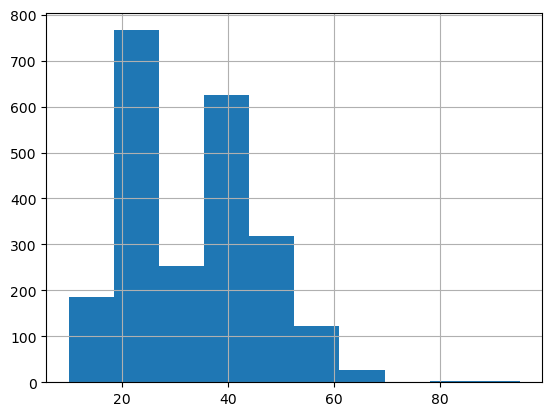

In [10]:
df_skills['stamina'].hist()

In [11]:
df_skills["stamina"].describe()

count    2306.000000
mean       33.591087
std        12.252218
min        10.063333
25%        23.492500
50%        34.726540
75%        42.553138
max        95.033889
Name: stamina, dtype: float64

In [12]:
from sklearn import preprocessing
fighters_normalized = df_skills[['FIGHTER',"ground_def_skill","ground_att_skill", "stand_def_skill","stand_att_skill", "stamina"]].copy()
fighters_normalized.iloc[:,1:] =  preprocessing.normalize(fighters_normalized.iloc[:,1:])
fighters_normalized.iloc[:,1:]=fighters_normalized.iloc[:,1:].apply(lambda x:round(x*100,0)) 
fighters_normalized = fighters_normalized.set_index('FIGHTER')
fighters_normalized.describe()

,ground_def_skill,ground_att_skill,stand_def_skill,stand_att_skill,stamina
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,51.964441,28.367736,56.984389,41.738942,30.550304
std,9.290750,13.637930,11.402162,10.400585,7.837744
min,21.000000,2.000000,7.000000,3.000000,8.000000
25%,47.000000,20.000000,50.000000,36.250000,25.000000
50%,52.000000,28.000000,56.000000,43.000000,31.000000
75%,57.000000,37.750000,63.000000,49.000000,36.000000
max,87.000000,74.000000,90.000000,68.000000,61.000000


In [13]:
skills_to_chart = df_skills[['FIGHTER',"ground_def_skill","ground_att_skill", "stand_def_skill","stand_att_skill", "stamina"]].copy().set_index('FIGHTER')

In [14]:
fighter = 'Nate Diaz'
opponent = 'Conor McGregor'

In [15]:
skills_to_chart.loc[opponent].values.flatten().tolist()

[60.81127964291003,
 37.33658056736688,
 68.22696790844282,
 84.59462461128388,
 42.32214285714286]

In [16]:
df_skills.loc[df_skills['FIGHTER']==fighter,["ground_def_skill","ground_att_skill", "stand_def_skill","stand_att_skill", "stamina"]].values.flatten().tolist()

[84.30045950886901,
 60.87427496320926,
 74.81411118614044,
 57.53393063996354,
 43.0079012345679]

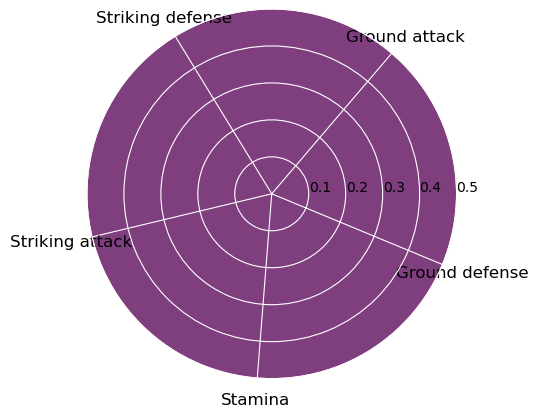

In [19]:
from matplotlib import rcParams
from math import pi
def chart(values1, values2):
    import matplotlib.pyplot as plt
    rcParams['xtick.major.pad'] = '5'
    rcParams['ytick.major.pad'] = '5'
    # Define the categories and values
    categories = ['Ground defense', 'Ground attack', 'Striking defense', 'Striking attack', 'Stamina']   

    # Create the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True,facecolor='yellow')

    # Plot the data
    ax.plot(np.linspace(0, 2*np.pi, len(categories), endpoint=False), values1, 'o-', linewidth=1, color='red')
    ax.plot(np.linspace(0, 2*np.pi, len(categories), endpoint=False), values2, 'o-', linewidth=1, color='blue')
    ax.fill(np.linspace(0, 2*np.pi, len(categories), endpoint=False), values1, alpha=0.5, color='red')
    ax.fill(np.linspace(0, 2*np.pi, len(categories), endpoint=False), values2, alpha=0.5, color='blue')
    ax.set_theta_offset(-np.pi/8)
 
    # Add labels
    ax.set_thetagrids(np.linspace(0, 360, len(categories), endpoint=False), categories, color='black',fontsize='12')
    ax.grid(color='white')
    ax.set_rmax(0.5)
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    # Show the plot
    return ax,plt

v1 = skills_to_chart.loc[fighter].values.flatten().tolist()
v2 = skills_to_chart.loc[opponent].values.flatten().tolist()
a,p = chart(v1,v2)
p.show()

In [18]:
df_skills.to_csv('df_skills.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'df_skills.csv'